<a href="https://colab.research.google.com/github/Pratham-04/CS786A-Spring-2020-21/blob/main/Project/Experiment_Checks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selecting rewards for the game on the criteria, that
1. Each arm is the best at least once
2. Number of best-arm flips in the chosen set is the same as the average in that condition
There are 4 conditions (stable, variable) X (trend, no trend)
Trend is a constant drift in the rewards. Stable and variable implies low and high volatility.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def makeRew(trend, stable, clip, numTrials, s):
    np.random.seed(s)
    
    mus = []
    rews = []
    mu = np.array([-60, -20, 20, 60])
    np.random.shuffle(mu)
    mus.append(mu)
    sigma1 = 4
    decay = 0.9836
    
    kappas = np.zeros(4)
    if trend == 1:
        for i in range(len(mu)):
            if mu[i] == -60:
                kappas[i] = 0.5
            elif mu[i] == -20:
                kappas[i] = 0.5
            elif mu[i] == 20:
                kappas[i] = -0.5
            else:
                kappas[i] = -0.5
                
    sigma2 = 4        
    rews.append(np.random.normal(mu, sigma2))           
    for i in range(numTrials - 1):
        if stable == 0 and (51<=i<=100 or 151<=i<=200):
            sigma2 = 16
        else:
            sigma2 = 4
        mu = np.multiply(mu, decay)
        mu = np.add(mu, kappas)
        mu = np.random.normal(mu, sigma2)
        if clip == 1:
            mu = np.clip(mu, -100, 100)
        mus.append(mu)
        
        rew = np.random.normal(mu, sigma1)
        if clip == 1:
            rew = np.clip(rew, -100, 100)
        rews.append(rew)
    
    # This part was removed for the next cell to calculate average values
    maxs = np.argmax(rews, 1)
    if ((0 in maxs) and (1 in maxs) and (2 in maxs) and (3 in maxs)):
        return np.array(mus), np.array(rews)
    else:
        return None, None
#     return np.array(mus), np.array(rews)
            

def countChange(rews):
    maxs = np.argmax(rews, 1)
    change = np.where(maxs[:-1] != maxs[1:])[0]
    return len(change)

In [ ]:
numTrials = 200
s = None

trend = 0
stable = 0
clip = 0
print("For stable = " + str(stable) + ", trend = " + str(trend))
counts = []
for i in range(10000):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    counts.append(countChange(rews))
counts = np.array(counts)
print(np.mean(counts))
print(np.std(counts))

trend = 0
stable = 1
clip = 0
print("For stable = " + str(stable) + ", trend = " + str(trend))
counts = []
for i in range(10000):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    counts.append(countChange(rews))
counts = np.array(counts)
print(np.mean(counts))
print(np.std(counts))

trend = 1
stable = 0
clip = 0
print("For stable = " + str(stable) + ", trend = " + str(trend))
counts = []
for i in range(10000):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    counts.append(countChange(rews))
counts = np.array(counts)
print(np.mean(counts))
print(np.std(counts))

trend = 1
stable = 1
clip = 0
print("For stable = " + str(stable) + ", trend = " + str(trend))
counts = []
for i in range(10000):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    counts.append(countChange(rews))
counts = np.array(counts)
print(np.mean(counts))
print(np.std(counts))

For stable = 0, trend = 0
21.6931
9.701933435661163
For stable = 1, trend = 0
27.6235
12.417574149164562
For stable = 0, trend = 1
22.3548
9.397633582982474
For stable = 1, trend = 1
23.5739
11.316198071348875


197


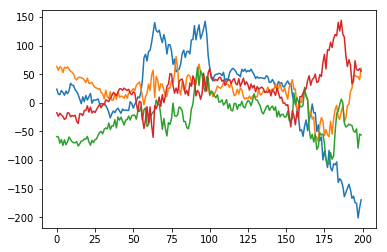

207


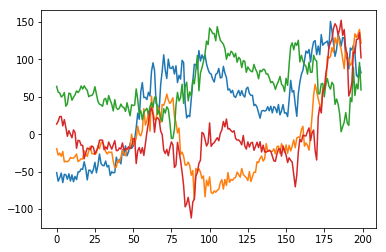

224


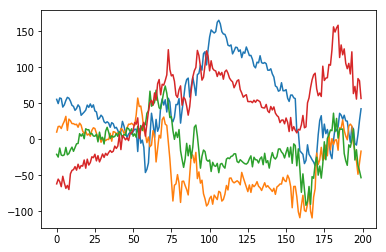

251


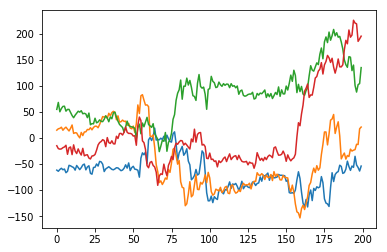

266


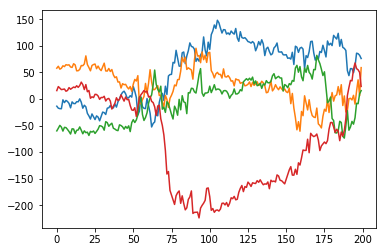

368


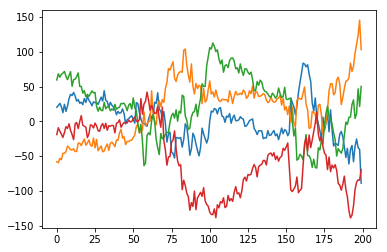

In [ ]:
stable = 0
trend = 0
clip = 0
numTrials = 200
for s in range(100,400):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    #print(mus)
    if np.any(mus == None):
        continue
    elif countChange(rews) == 21:
        print(s)
        plt.plot(rews)
        plt.show()

11


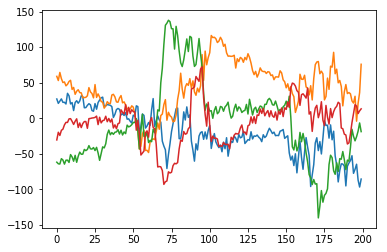

20


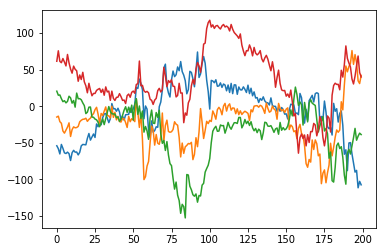

49


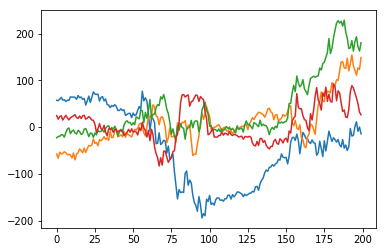

67


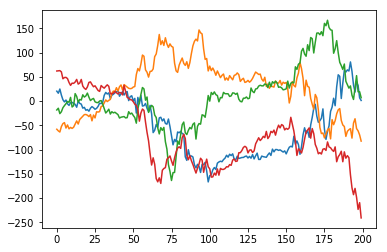

70


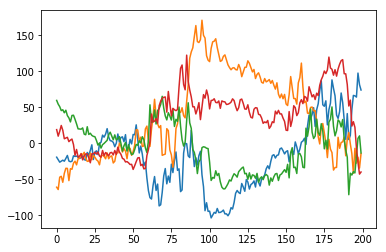

85


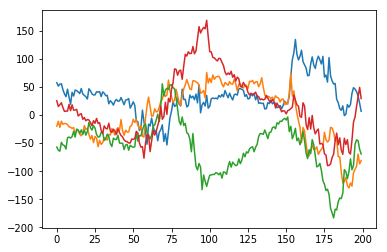

89


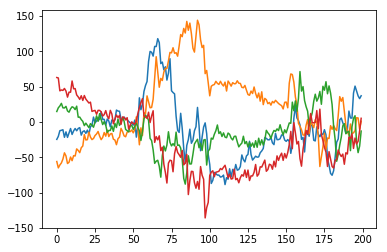

141


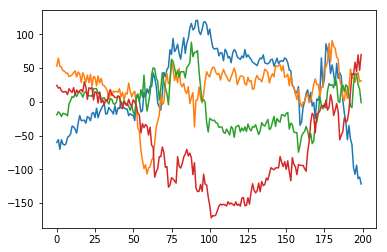

188


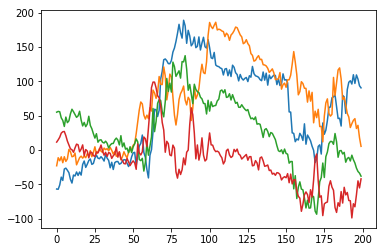

198


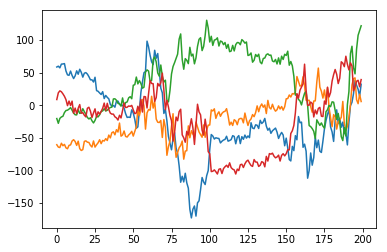

208


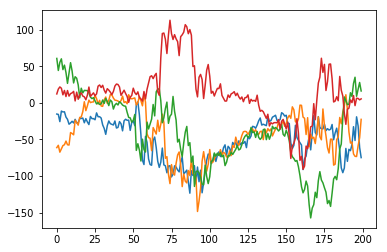

219


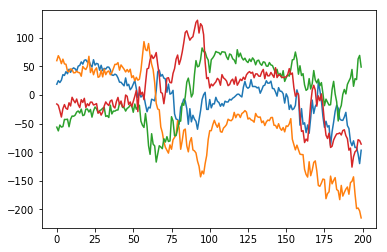

236


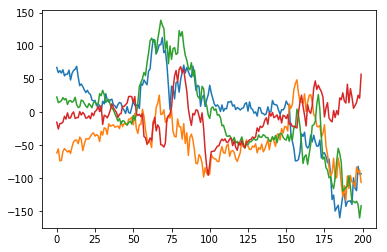

252


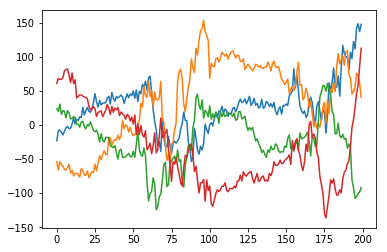

280


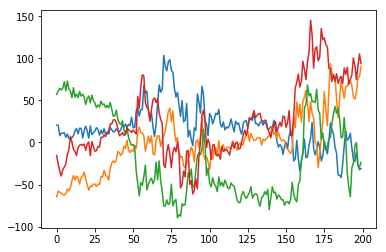

287


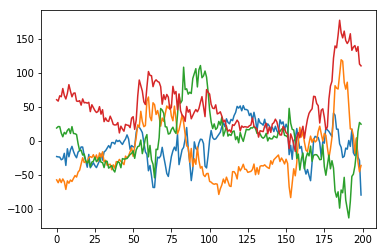

299


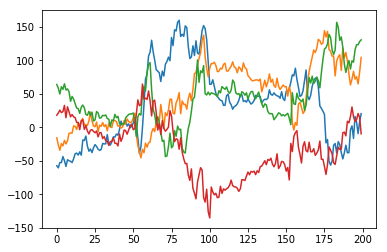

In [ ]:
stable = 0
trend = 1
clip = 0
numTrials = 200
for s in range(0,300):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    #print(mus)
    if np.any(mus == None):
        continue
    elif countChange(rews) == 22:
        print(s)
        plt.plot(rews)
        plt.show()

82


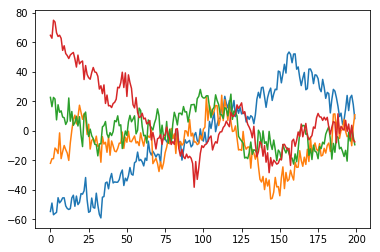

103


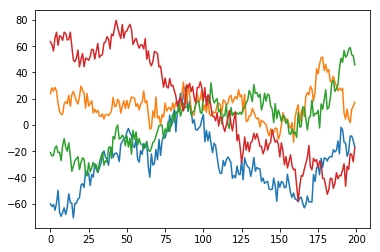

203


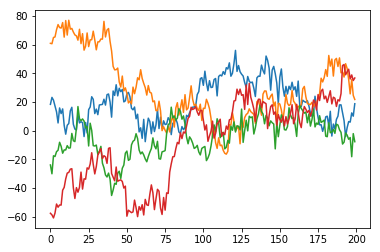

278


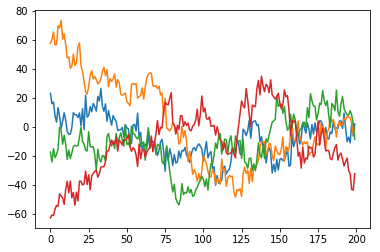

309


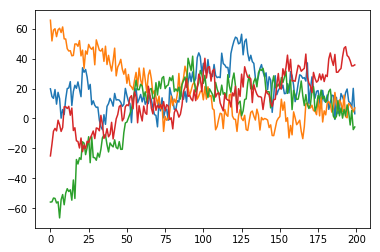

341


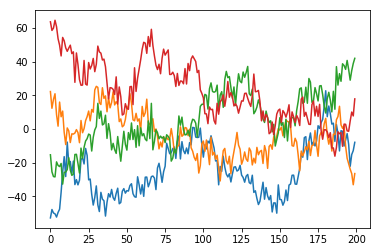

387


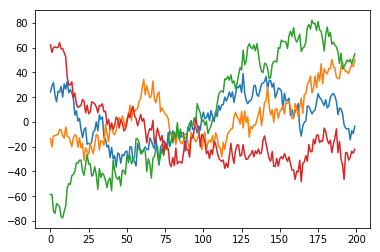

411


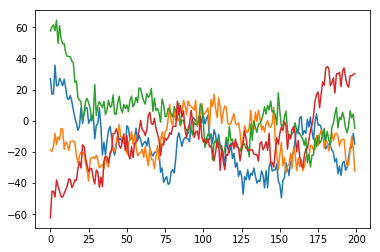

In [ ]:
stable = 1
trend = 0
clip = 0
numTrials = 200
for s in range(50,500):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    #print(mus)
    if np.any(mus == None):
        continue
    elif countChange(rews) == 27:
        print(s)
        plt.plot(rews)
        plt.show()

75


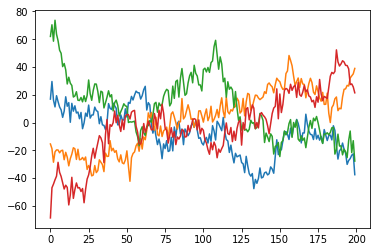

177


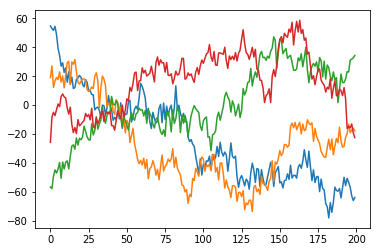

231


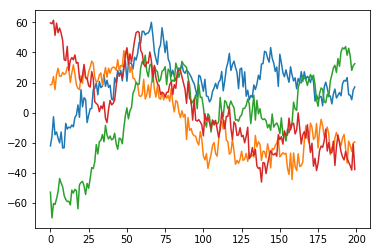

287


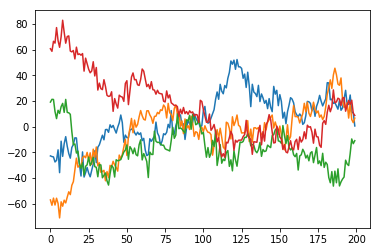

297


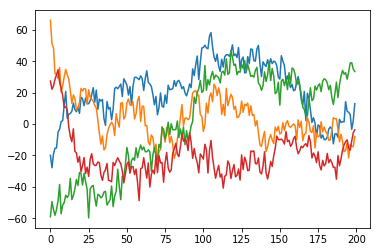

328


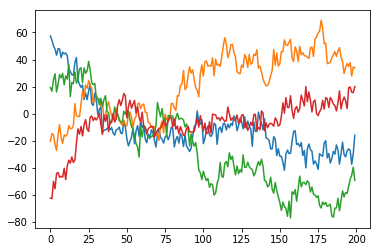

339


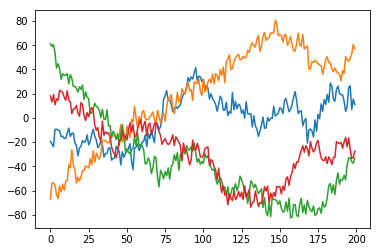

395


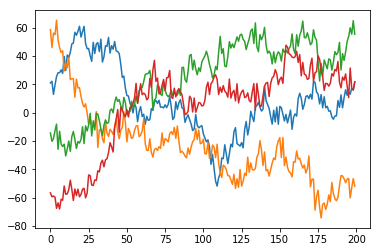

In [ ]:
stable = 1
trend = 1
clip = 0
numTrials = 200
for s in range(0,400):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    #print(mus)
    if np.any(mus == None):
        continue
    elif countChange(rews) == 24:
        print(s)
        plt.plot(rews)
        plt.show()

Unstable, No trend - 21 flips - seed 207, 368<br>
Unstable, Trend - 22 flips - seed 49, 67<br>
Stable, No trend - 27 flips - seed 82, 411<br>
Stable, Trend - 24 flips - seed 75, 287<br>